What is the goal of Document Image Analysis?

It must be automatic building of content database with minimum user interaction. 

Traditional way of doing it is:
1. image preprocessing
1. blob detection and bouning box segmentation
1. recognition of each bounding box separately
1. recognition of spatially consecutive bounding boxes.

Here, we will play with a document image and try to segment out blobs of characters with some image processing and filtering.

References
1. https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
1. http://www.mdpi.com/2313-433X/4/2/43/htm

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
print (cv.__version__)

3.3.1


Let's consider a scanned image of a book.

In [2]:
imagefilename = '020-021.jpg'
img = cv.imread (imagefilename)
img.shape

(2012, 2700, 3)

img is a `numpy` type array. Its dimension can be retrived by the command `img.shape`

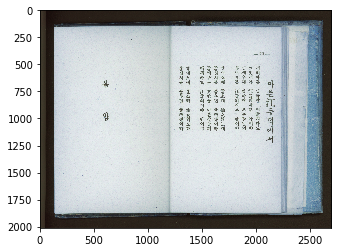

In [3]:
plt.imshow (img)
plt.show()

Too small to see what's in the image.

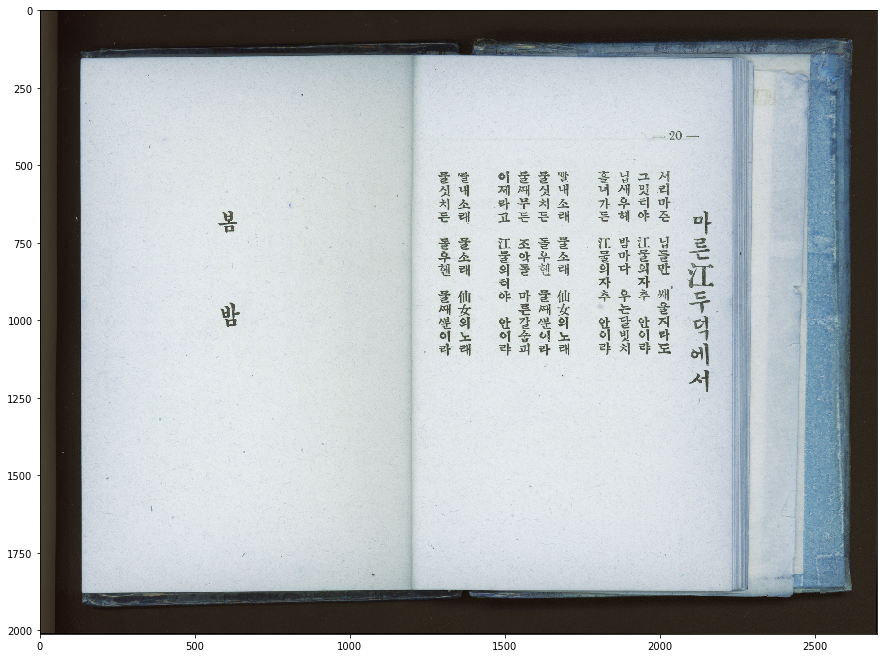

In [4]:
plt.figure (figsize=(15,15))
plt.axis('on')
plt.imshow (img)
plt.show()

1. We don't need all of the images. boundary parts are not useful. Maybe we can remove non-content part automatically, but later.
1. Simply use `gimp` to crop & save it to a PNG file.

(944, 1660, 3)
pixel value at (r=100, c=200) =  [220 226 225]


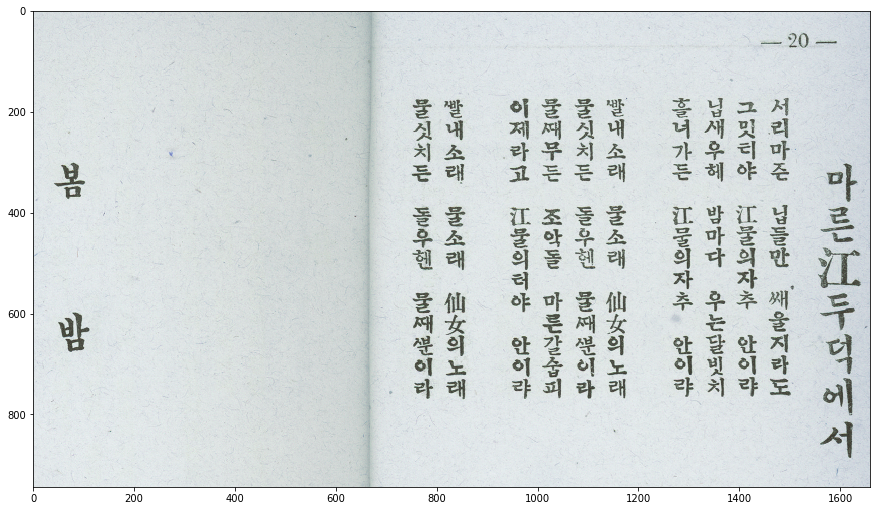

In [6]:
cropped = cv.imread ('020-021-cropped.png')
print (cropped.shape)
print ('pixel value at (r=100, c=200) = ', cropped[100,200])
plt.figure (figsize=(15,15))
plt.imshow (cropped)

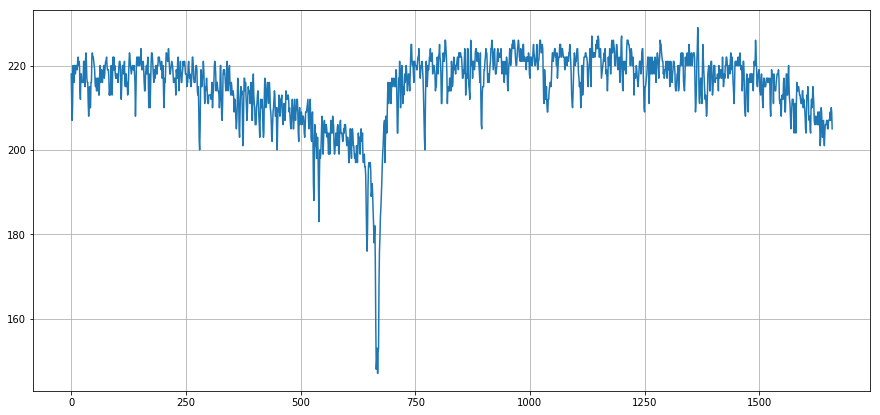

In [7]:
pixels1d = cropped[100, :, 0]
plt.figure (figsize = (15, 7))
plt.grid (True)
plt.plot (pixels1d)

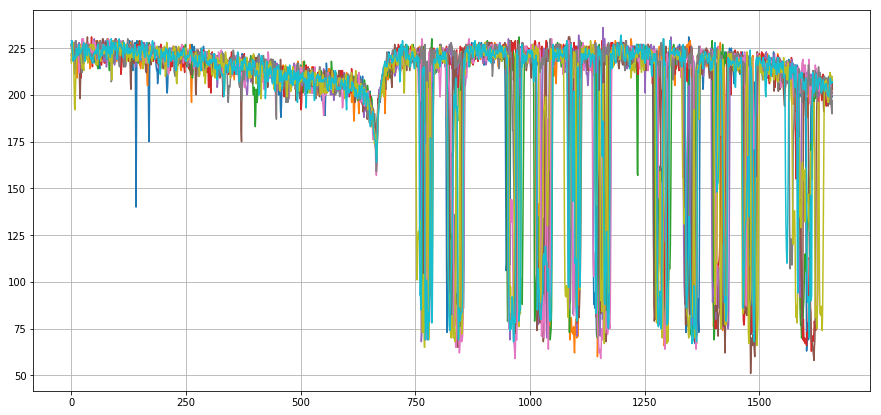

In [8]:
plt.figure (figsize = (15, 7))
plt.grid (True)
for row in range (400, 500, 10):
    pixels1d = cropped[row, :, 0]
    plt.plot (pixels1d)
plt.show()

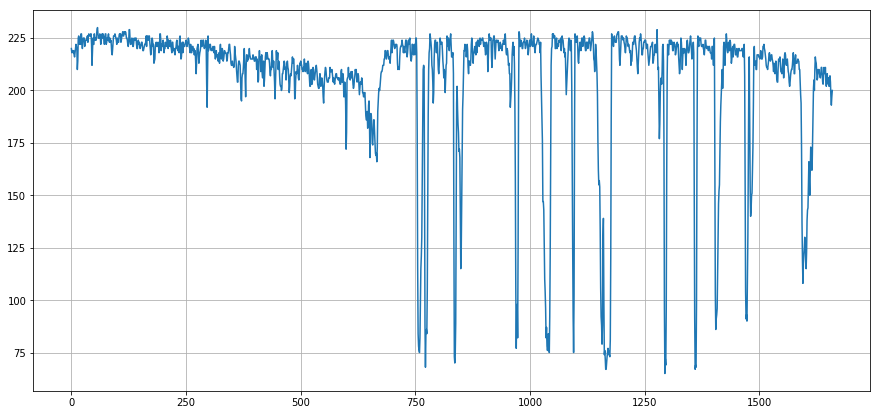

In [9]:
row = 458
pixels1d = cropped[row, :, 0]
plt.figure (figsize = (15, 7))
plt.grid (True)
plt.plot (pixels1d)

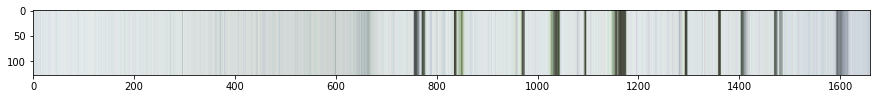

In [10]:
rowimage = cropped[row:row+1]
for i in range (7):
    rowimage = np.vstack ((rowimage, rowimage))
plt.figure (figsize=(15,10))
plt.imshow (rowimage)

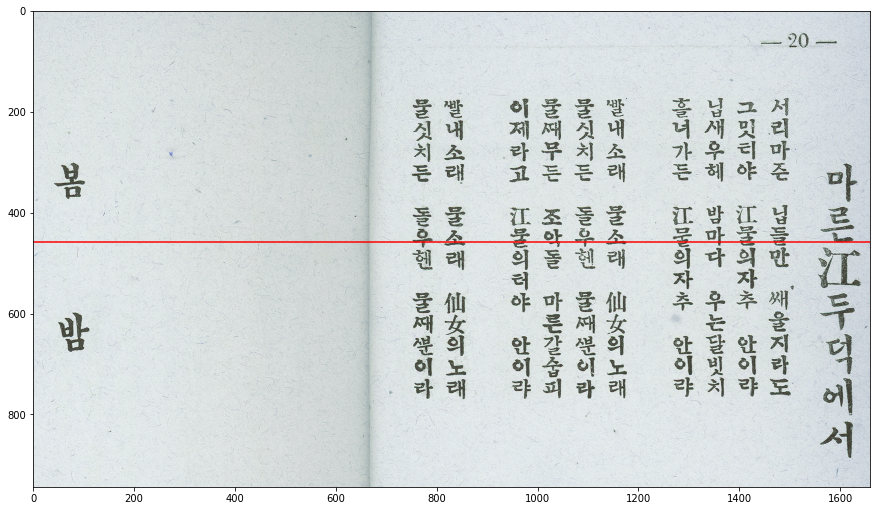

In [11]:
fig, ax = plt.subplots(1, figsize=(15,15))
ax.imshow (cropped)
ax.axhline(y=row, color='r', linestyle='-')

1. Maybe we don't need RGB color representation. So, let's convert it to a gray scale image.
2. Let's examine its histogram.

gray dimension (height x width) =  (944, 1660)
pixel value at (r=100, c=200) =  224


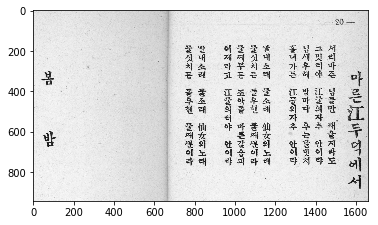

In [12]:
gray = cv.cvtColor (cropped, cv.COLOR_RGB2GRAY)
print ('gray dimension (height x width) = ', gray.shape)
print ('pixel value at (r=100, c=200) = ', gray[100,200])
plt.imshow (gray, cmap='gray') # without cmap='gray', a wiered color will be shown

Histogram

In [13]:
hist1d = np.zeros (256)
print (hist1d)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [14]:
hist1d[0:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [15]:
for r in range(gray.shape[0]):
    for c in range(gray.shape[1]):
        intensity = gray[r,c]
        hist1d[intensity] += 1
    #
#

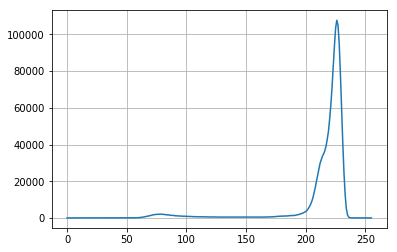

In [16]:
plt.grid(True)
plt.plot (hist1d)

Let's do binarization of the image, by choosing a threshold.

In [17]:
threshold = 160

binary = gray.copy()
for r in range (binary.shape[0]):
    for c in range (binary.shape[1]):
        binary[r,c] = 0 if binary[r,c] < threshold else 255
    #
#

cv.imwrite ('binary.png', binary)

True

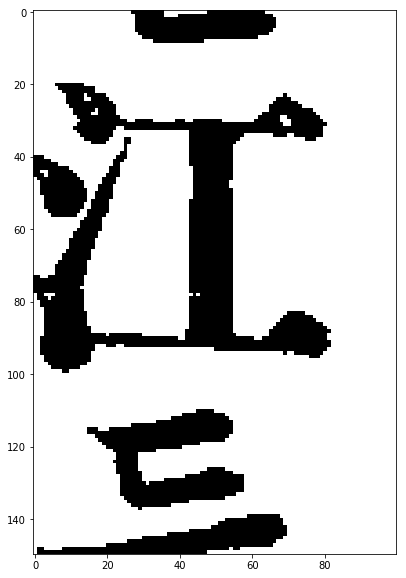

In [22]:
plt.figure (figsize=(10,10))
plt.imshow (binary[450:600,1560:1960], cmap='gray')

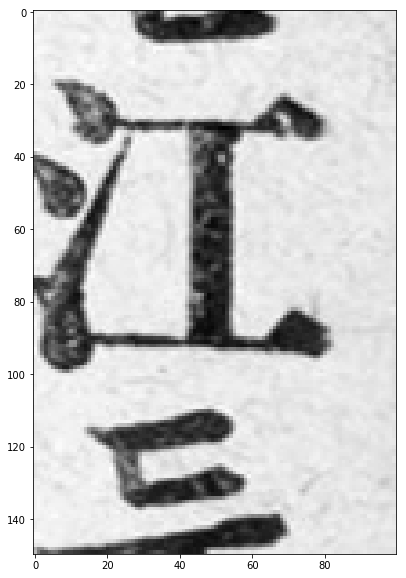

In [24]:
plt.figure (figsize=(10,10))
plt.imshow (gray[450:600,1560:1960], cmap='gray')